CA2: Interactive Dashboard Project
========================================

The primary objective of this EU Economic Dashboard is to answer the question: 

How do EU countries key macroeconomic indicators change over time and how they compare to each other?

The key metrics attempts to answer the following questions:

- How do the trend of indicators compare to each other over the years? 
- How do selected aggregation of key indicators compare to each other?
- How do the indicators relate to each other?
- How does average of indicators compare across the EU countries?

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Required libraries are imported.

In [4]:
# Loading data
df = pd.read_excel('dataset_CA2.xlsx')

# Checking the first 5 rows of the data
print(df.head())

  Country Name Country Code  \
0      Austria          AUT   
1      Austria          AUT   
2      Austria          AUT   
3      Austria          AUT   
4      Austria          AUT   

                                         Series Name     Series Code  \
0                       GDP per capita (current US$)  NY.GDP.PCAP.CD   
1              Inflation, consumer prices (annual %)  FP.CPI.TOTL.ZG   
2           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS   
3                                  Population, total     SP.POP.TOTL   
4  Foreign direct investment, net (BoP, current US$)  BN.KLT.DINV.CD   

              2009              2010                2011              2012  \
0     47857.444664      46611.139342        51116.895352      48250.405914   
1         0.506309          1.813534            3.286579          2.485676   
2        45.486911         51.583982           54.292077         54.325492   
3          8343323           8363404             8391643           8

The data is read from excel files and stored in a pandas DataFrame (df), and the first five rows are displayed to verify the data is loaded correctly.


In [5]:
# Looking at the shape
print('Shape of data:', df.shape)

# Looking at the list of columns
print('Columns:', df.columns.tolist())

# Basic data information
print('\nData information:')
print(df.info())

Shape of data: (270, 19)
Columns: ['Country Name', 'Country Code', 'Series Name', 'Series Code', 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  270 non-null    object 
 1   Country Code  270 non-null    object 
 2   Series Name   270 non-null    object 
 3   Series Code   270 non-null    object 
 4   2009          270 non-null    object 
 5   2010          270 non-null    object 
 6   2011          270 non-null    object 
 7   2012          270 non-null    object 
 8   2013          270 non-null    object 
 9   2014          270 non-null    object 
 10  2015          270 non-null    object 
 11  2016          270 non-null    object 
 12  2017          270 non-null    object 
 13  2018          270 non-null    object 
 

The shape of the DataFrame is printed to know the number of rows and columns in the dataset. A list of columns is printed to understand the columns available in the dataset and data information is checked to understand the data types and non-null counts of each column. The data is seen to be in a wide format, which need to be transformed to a long format for better analysis.

In [6]:
# Changing data to long format
df_long = df.melt(id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'], 
                  var_name='Year', 
                  value_name='Value')

# Changing Year column to integer
df_long['Year'] = df_long['Year'].astype(int)

# Changing Value column to numeric and coercing errors to nan
df_long['Value'] = pd.to_numeric(df_long['Value'], errors='coerce')

# Pivoting data for each indicator (Series Name) to become a separate column
df_pivot = df_long.pivot_table(index=['Country Name', 'Country Code', 'Year'], 
                               columns='Series Name', 
                               values='Value',
                               aggfunc='mean').reset_index()

# Checking the data
print('\nPivoted data:')
print(df_pivot.head())


Pivoted data:
Series Name Country Name Country Code  Year  \
0                Austria          AUT  2009   
1                Austria          AUT  2010   
2                Austria          AUT  2011   
3                Austria          AUT  2012   
4                Austria          AUT  2013   

Series Name  Bank nonperforming loans to total gross loans (%)  \
0                                                     2.250423   
1                                                     2.830717   
2                                                     2.706816   
3                                                     2.813365   
4                                                     2.866542   

Series Name  Exports of goods and services (% of GDP)  \
0                                           45.486911   
1                                           51.583982   
2                                           54.292077   
3                                           54.325492   
4                   

Dataset reshaping is done using the pandas melt function, which converts the wide format to a long format. The variable name is Year instead of individual years and Value as value of the years. The year column is converted to integer type and the value column is cleaned by converting it to numeric and missing values are filled with nan. The data is then pivoted to have a column for each indicator (GeeksforGeeks, n.d.).

In [7]:
# Checking for duplicates
print('Number of duplicates:', df_pivot.duplicated().sum())

# Checking missing values
print('Missing values:')
print(df_pivot.isnull().sum())

Number of duplicates: 0
Missing values:
Series Name
Country Name                                                         0
Country Code                                                         0
Year                                                                 0
Bank nonperforming loans to total gross loans (%)                   54
Exports of goods and services (% of GDP)                             0
Foreign direct investment, net (BoP, current US$)                    0
GDP per capita (current US$)                                         0
High-technology exports (% of manufactured exports)                  0
Inflation, consumer prices (annual %)                                0
Net capital account (BoP, current US$)                               0
Population, total                                                    0
Tax revenue (% of GDP)                                              30
Unemployment, total (% of total labor force) (national estimate)     0
dtype: int64


Panel dataset is checked for duplicates and missing values. No duplicates but missing values are found (Ford, 2025).

In [10]:
# Filling missing values with mean values
df_pivot['Bank nonperforming loans to total gross loans (%)'] = df_pivot['Bank nonperforming loans to total gross loans (%)'].fillna(df_pivot['Bank nonperforming loans to total gross loans (%)'].mean())
df_pivot['Tax revenue (% of GDP)'] = df_pivot['Tax revenue (% of GDP)'].fillna(df_pivot['Tax revenue (% of GDP)'].mean())

# Rechecking missing values
print('Missing values:')
print(df_pivot.isnull().sum())

Missing values:
Series Name
Country Name                                                        0
Country Code                                                        0
Year                                                                0
Bank nonperforming loans to total gross loans (%)                   0
Exports of goods and services (% of GDP)                            0
Foreign direct investment, net (BoP, current US$)                   0
GDP per capita (current US$)                                        0
High-technology exports (% of manufactured exports)                 0
Inflation, consumer prices (annual %)                               0
Net capital account (BoP, current US$)                              0
Population, total                                                   0
Tax revenue (% of GDP)                                              0
Unemployment, total (% of total labor force) (national estimate)    0
dtype: int64


The missing values are filled with the mean of the column and the data is checked again for missing values to ensure all missing values are filled. 

In [11]:
# Renaming columns
df_pivot.rename(columns={
    'Country Name': 'country_name',
    'Country Code': 'country_code',
    'Year': 'year'
}, inplace=True) 

df_pivot.rename(columns={
    'Bank nonperforming loans to total gross loans (%)': 'nonperforming_loans (%)',
    'Exports of goods and services (% of GDP)': 'exports (%)',
    'Foreign direct investment, net (BoP, current US$)': 'foreign_direct_investment (US$)',
    'GDP per capita (current US$)': 'gdp_per_capita (US$)',
    'High-technology exports (% of manufactured exports)': 'high_tech_exports (%)',
    'Inflation, consumer prices (annual %)': 'inflation_annual (%)',
    'Net capital account (BoP, current US$)': 'net_capital (US$)',
    'Population, total': 'population_total',
    'Tax revenue (% of GDP)': 'tax_revenue (%)',
    'Unemployment, total (% of total labor force) (national estimate)': 'unemployment_rate (%)',
}, inplace=True)

# Checking basic information of the panel dataset after cleaning and transformation
print('\nPivoted data information:')
print(df_pivot.info())

# Saving the cleaned data
print('\nData saved to "dataCA2_clean.xlsx" successfully.')
df_pivot.to_excel('dataCA2_clean.xlsx', index=False)


Pivoted data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_name                     405 non-null    object 
 1   country_code                     405 non-null    object 
 2   year                             405 non-null    int64  
 3   nonperforming_loans (%)          405 non-null    float64
 4   exports (%)                      405 non-null    float64
 5   foreign_direct_investment (US$)  405 non-null    float64
 6   gdp_per_capita (US$)             405 non-null    float64
 7   high_tech_exports (%)            405 non-null    float64
 8   inflation_annual (%)             405 non-null    float64
 9   net_capital (US$)                405 non-null    float64
 10  population_total                 405 non-null    float64
 11  tax_revenue (%)                  405 non-null    float64


Columns are renamed to have a more meaningful name. Basic information about the dataset is printed again to check the changes made (Kaggle, n.d.). 

In [12]:
# Descriptive statistics for numeric variables
print('\nDescriptive statistics of continuous variables:')
print(df_pivot[[
    'nonperforming_loans (%)', 'exports (%)', 'foreign_direct_investment (US$)',
    'gdp_per_capita (US$)', 'high_tech_exports (%)', 'inflation_annual (%)',
    'net_capital (US$)', 'population_total', 'tax_revenue (%)','unemployment_rate (%)'
]].describe())

# Descriptive statistics for a categorical variable
print('\nDescriptive statistics of categorical variables:')
print(df_pivot['country_name'].describe())


Descriptive statistics of continuous variables:
Series Name  nonperforming_loans (%)  exports (%)  \
count                     405.000000   405.000000   
mean                        7.213912    66.081657   
std                         7.439133    34.613425   
min                         0.145588    18.729882   
25%                         2.796823    41.476712   
50%                         5.071414    59.464567   
75%                         7.751972    80.589735   
max                        47.747846   213.222679   

Series Name  foreign_direct_investment (US$)  gdp_per_capita (US$)  \
count                           4.050000e+02            405.000000   
mean                            4.215512e+09          35056.316434   
std                             2.997812e+10          23720.900329   
min                            -1.523447e+11           6863.667068   
25%                            -3.944547e+09          17980.729824   
50%                            -8.855100e+08         

The descriptive statistics of all 10 key macroeconomic indicators are printed to understand the data better. The mean, standard deviation, minimum, maximum, and quartiles are calculated for each indicator. The categorical variable of country has 27 unique values covering all EU countries.

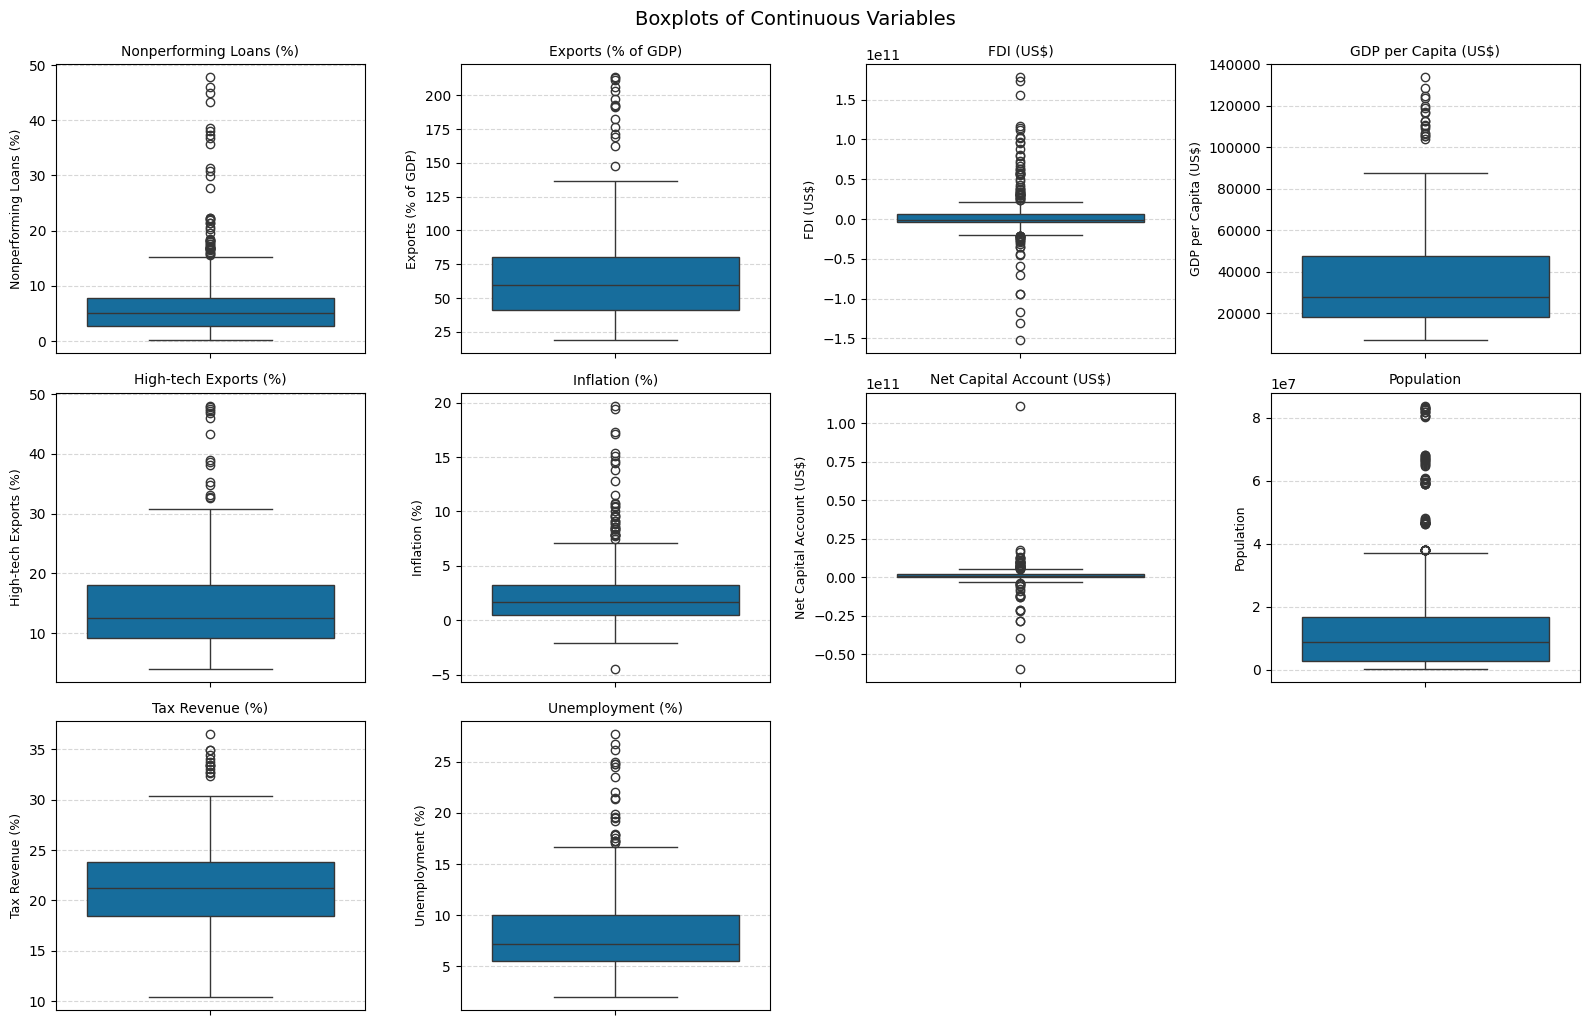

In [15]:
# Colorblind friendly palette
sns.set_palette('colorblind')

# Variables and their display labels
variables = [
    'nonperforming_loans (%)', 'exports (%)', 'foreign_direct_investment (US$)',
    'gdp_per_capita (US$)', 'high_tech_exports (%)', 'inflation_annual (%)',
    'net_capital (US$)', 'population_total', 'tax_revenue (%)','unemployment_rate (%)'
]

labels = {
    'nonperforming_loans (%)': 'Nonperforming Loans (%)',
    'exports (%)': 'Exports (% of GDP)',
    'foreign_direct_investment (US$)': 'FDI (US$)',
    'gdp_per_capita (US$)': 'GDP per Capita (US$)',
    'high_tech_exports (%)': 'High-tech Exports (%)',
    'inflation_annual (%)': 'Inflation (%)',
    'net_capital (US$)': 'Net Capital Account (US$)',
    'population_total': 'Population',
    'tax_revenue (%)': 'Tax Revenue (%)',
    'unemployment_rate (%)': 'Unemployment (%)'
}
# large figure size for better visibility
plt.figure(figsize=(16, 10))

# Boxplots for all continuous variables
for i, var in enumerate(variables):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=var, data=df_pivot, showfliers=True)
    plt.title(labels[var], fontsize=10)
    plt.ylabel(labels[var], fontsize=9)
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle("Boxplots of Continuous Variables", fontsize=14, y=1.02)
plt.show()


Global colour blind palette is used for all plots. Boxplots of all continuous variables are plotted to check for outliers (Kaggle, n.d.). The boxplot show outliers in all variables, which are left in the dataset since they are macroeconomic indicators and may be important for analysis.

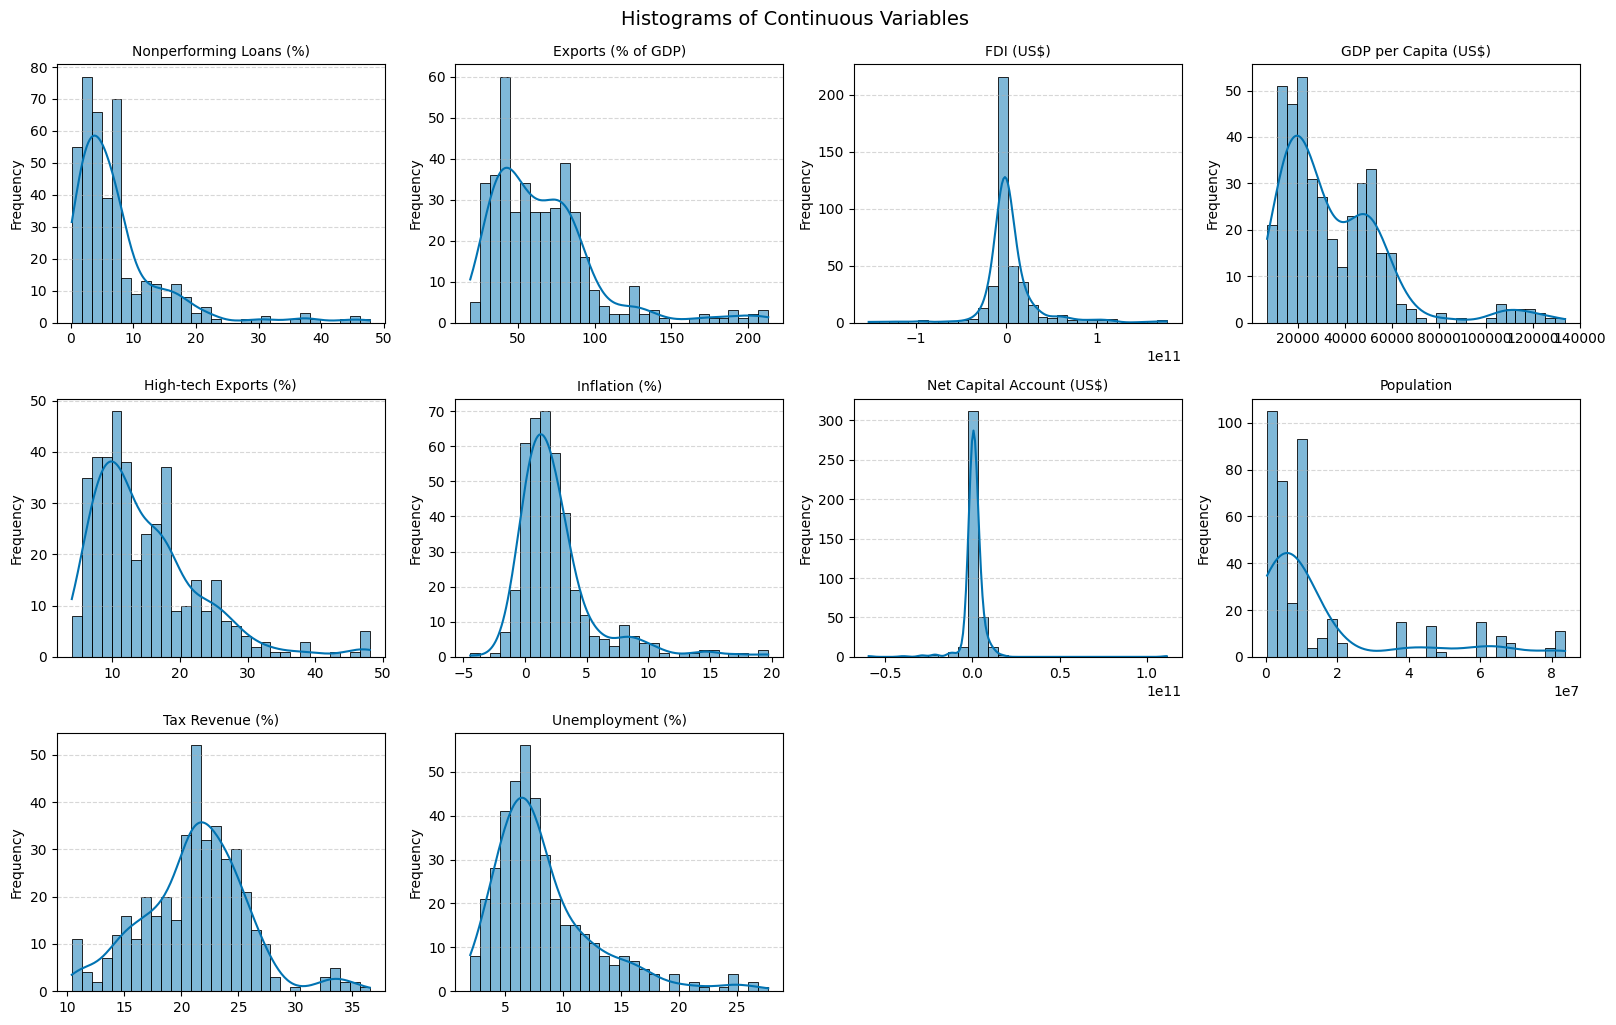

In [16]:
# Colorblind friendly palette
sns.set_palette('colorblind')

# Variables and their display labels
variables = [
    'nonperforming_loans (%)', 'exports (%)', 'foreign_direct_investment (US$)',
    'gdp_per_capita (US$)', 'high_tech_exports (%)', 'inflation_annual (%)',
    'net_capital (US$)', 'population_total', 'tax_revenue (%)','unemployment_rate (%)'
]

labels = {
    'nonperforming_loans (%)': 'Nonperforming Loans (%)',
    'exports (%)': 'Exports (% of GDP)',
    'foreign_direct_investment (US$)': 'FDI (US$)',
    'gdp_per_capita (US$)': 'GDP per Capita (US$)',
    'high_tech_exports (%)': 'High-tech Exports (%)',
    'inflation_annual (%)': 'Inflation (%)',
    'net_capital (US$)': 'Net Capital Account (US$)',
    'population_total': 'Population',
    'tax_revenue (%)': 'Tax Revenue (%)',
    'unemployment_rate (%)': 'Unemployment (%)'
}
# Histograms for all continuous variables
plt.figure(figsize=(16, 10))

for i, var in enumerate(variables):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_pivot[var].dropna(), kde=True, bins=30) 
    plt.title(labels[var], fontsize=10)
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.suptitle("Histograms of Continuous Variables", fontsize=14, y=1.02)
plt.show()

The distribution of the continuous variables are visualised using a histogram. The histogram shows that the key variables of unemployment, inflation and GDP per capita are normally distributed with a slight positive skewness, none of the variables were negatively skewed, but there are some outliers in the data that show a steeply pointed distribution in some variables.

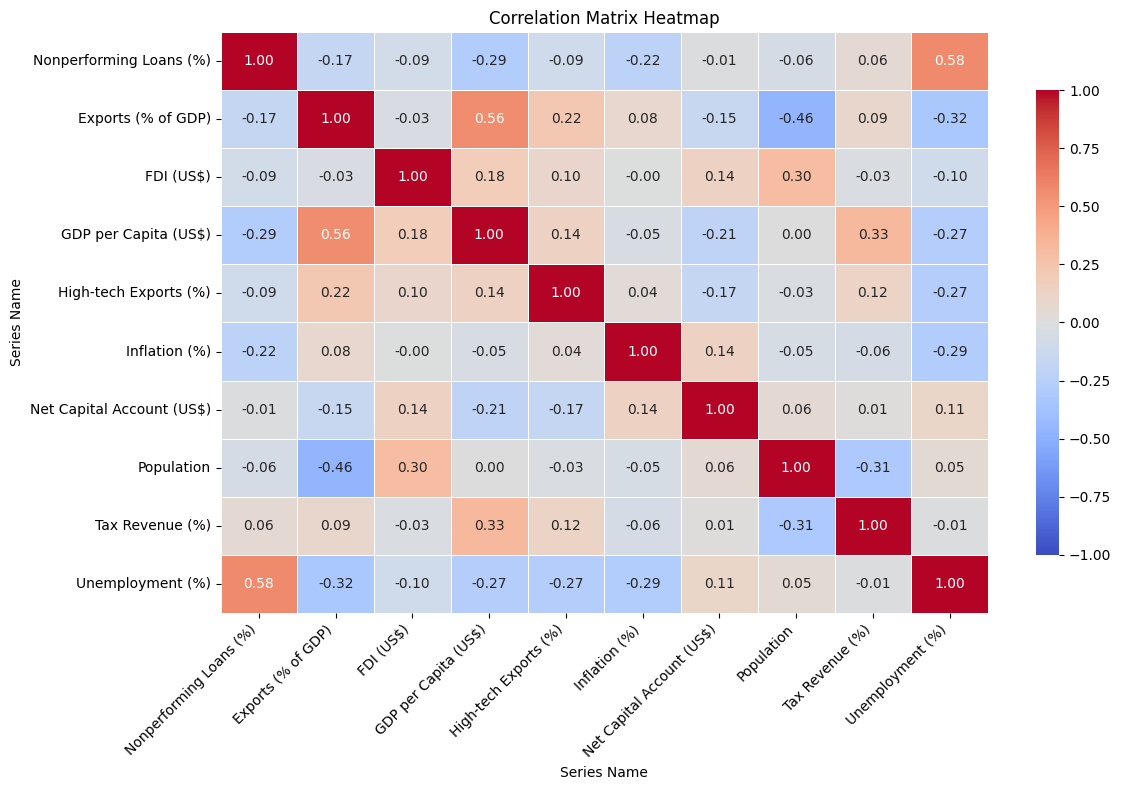

In [17]:
# Correlation matrix heatmap
corr_matrix = df_pivot[variables].corr()

corr_matrix_labels = corr_matrix.rename(columns=labels, index=labels)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_labels, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Correlation matrix heatmap shows the correlation between all continuous variables. The x-ticks was rotated 45 degrees to the right to enhance readability. The correlation coefficient ranges from -1 to 1. The closer the value is to 1 or -1, the stronger the correlation. A value of 0 indicates no correlation between the variables. The heatmap shows that there is a strong positive correlation between unemployment rate and nonperforming loans and GDP per capita and exports. 

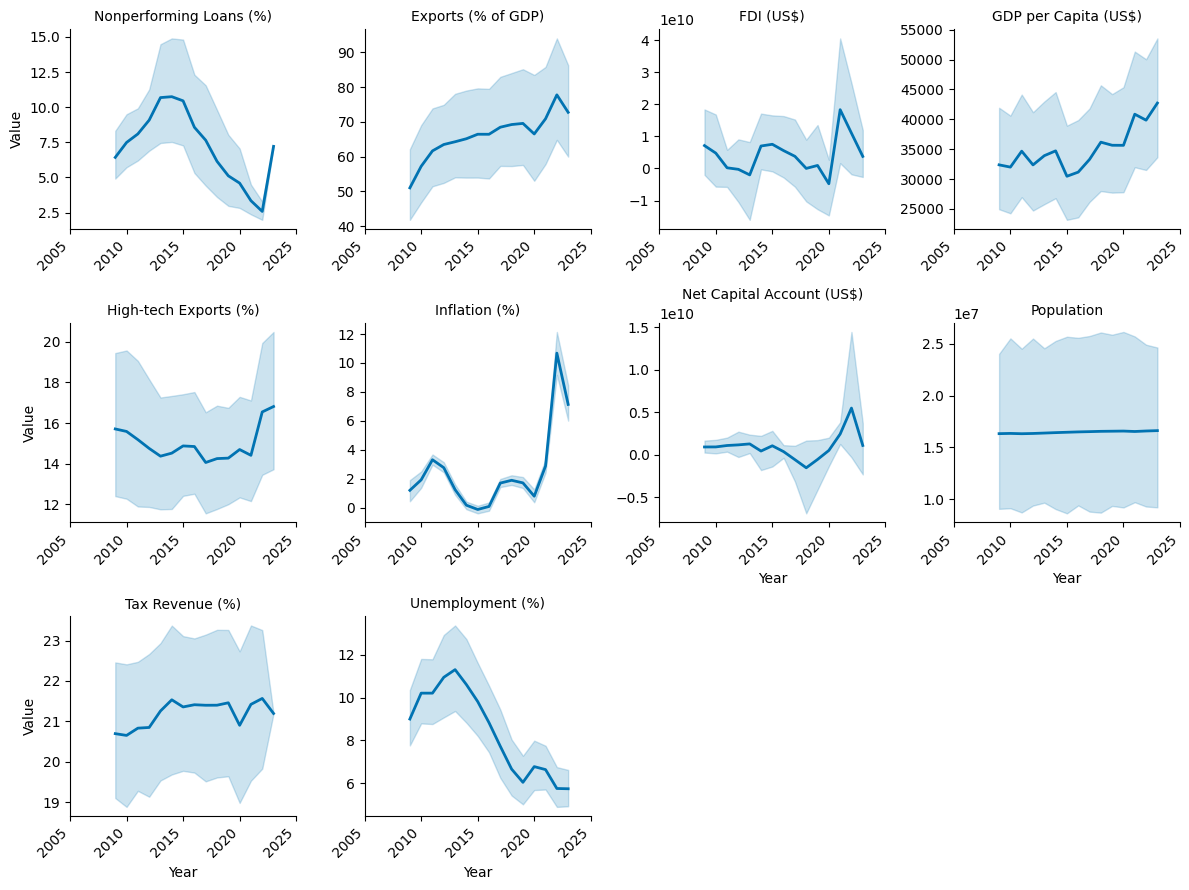

In [18]:
# Line plots for each variable over the years
df_long = df_pivot.melt(id_vars=['country_name', 'year'], value_vars=variables, 
                        var_name='Variable', value_name='Value')

# Using labels for better readability
df_long['Variable'] = df_long['Variable'].map(labels)

# Line plots with faceting for each variable
g = sns.FacetGrid(df_long, col="Variable", col_wrap=4, height=3, sharex=False, sharey=False)
g.map(sns.lineplot, 'year', 'Value', lw=2)

# Axis labels and titles
g.set_axis_labels("Year", "Value")
g.set_titles("{col_name}")

# Adjusting tick labels and layout
g.set_xticklabels(rotation=45, ha='right')
plt.tight_layout()
plt.show()


The line plots show the trend of all variable over the years and wrapped in one plot. The line plots show that the unemployment rate has been decreasing over the years, while inflation and GDP per capita have been increasing in the EU. The line plots also show that there are some outliers in the data, which may be important for analysis.

References

1. Ford, C. (2025). *Exploratory data analysis and statistics* [IS41570_lab_3]. University College Dublin.

2. GeeksforGeeks. (n.d.). *Reshape a wide dataframe to long in Pandas*. Retrieved from
 
     https://www.geeksforgeeks.org/reshape-a-wide-dataframe-to-long-in-pandas/

3. Kaggle. (n.d.). *Data Visualization*. Retrieved from
     
     https://www.kaggle.com/learn/data-visualization

2. World Bank. (2025). *World Development Indicators*. Retrieved from

     https://databank.worldbank.org/source/world-development-indicators